In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from datetime import datetime
from datetime import timedelta
from arch import arch_model
from statsmodels.tsa.stattools import adfuller

## The problem is that if I do the first diff I won;t be able to work my way back to the variance/std of the original time series. I do first diff cause u need stationarity but then.... So I go natural log returns.

In [2]:
df=pd.read_csv(r"C:\Users\Bogdan\OneDrive - University of Warwick\Desktop\Projects\Short-Term WTI Price Forecasting\Price prediction\Data.csv")
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d')
df['WTI'] = pd.to_numeric(df['WTI'])
df = df.sort_values(by='DATE', ascending=True)
df = df.set_index('DATE')
df = df.drop(columns=['Dubai','UK','Dubai Price', 'Texas', 'Brent'])
df = df.asfreq(pd.infer_freq(df.index))
df = df.resample('W').mean()
df['Log_Returns'] = np.log(df['WTI'] / df['WTI'].shift(1)) # r = ln(Pt/Pt-1)
df = df.drop(columns=['WTI'])
df['Std_Dev'] = df['Log_Returns'].expanding().std() #expanding() = allows you to apply a statistical function cumulatively from the start of a dataset up to each point in the dataset
df = df.dropna()
df

,Log_Returns,Std_Dev
DATE,,
2020-07-26,0.018753,0.010729
2020-08-02,-0.015898,0.017370
2020-08-09,0.011583,0.014947
2020-08-16,0.022011,0.015128
2020-08-23,0.015330,0.013857
...,...,...
2024-08-11,-0.016489,0.040102
2024-08-18,0.040724,0.040090
2024-08-25,-0.056231,0.040205


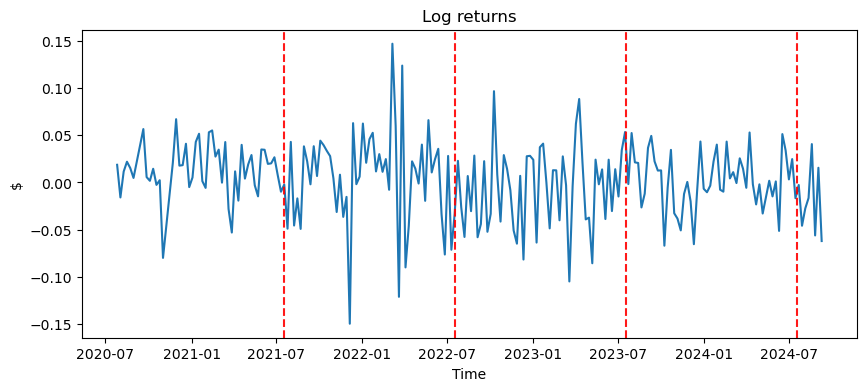

In [3]:
plt.figure(figsize=(10,4))
plt.plot(df['Log_Returns'])
plt.title('Log returns')
plt.xlabel('Time')
plt.ylabel('$')
for year in range(2021,2025):
    plt.axvline(pd.to_datetime(str(year)+'-07-18'),color='r', linestyle='--', alpha=0.9)
plt.show()

In [4]:
result = adfuller(df['Log_Returns'])
p_value = result[1]
formatted_p_value = "{:.2f}".format(p_value) #int 2 deicimal places
print("p-value:", formatted_p_value)

p-value: 0.00


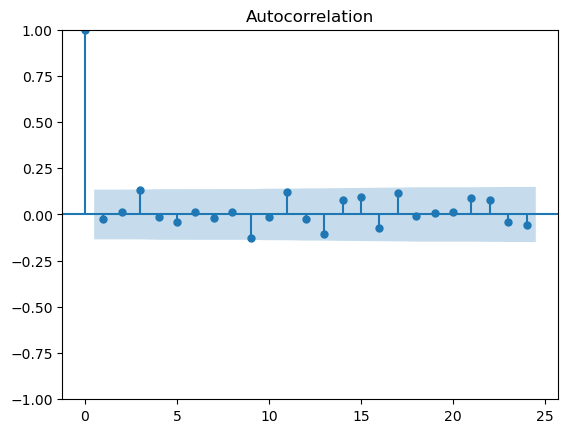

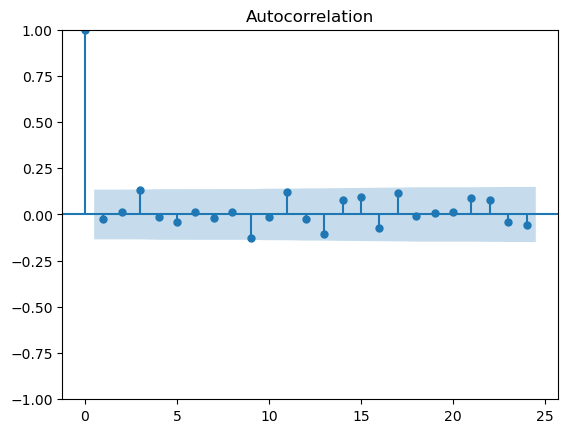

In [5]:
plot_acf(df['Log_Returns'])

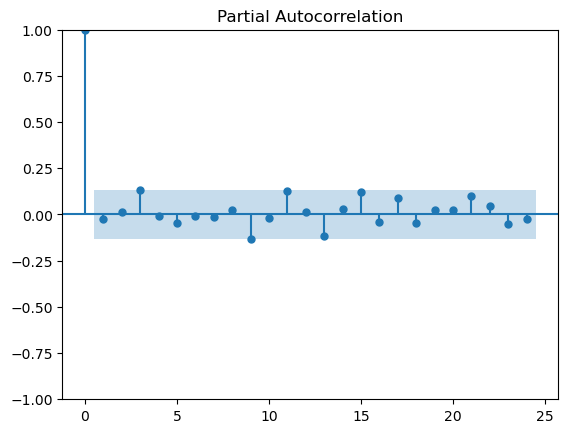

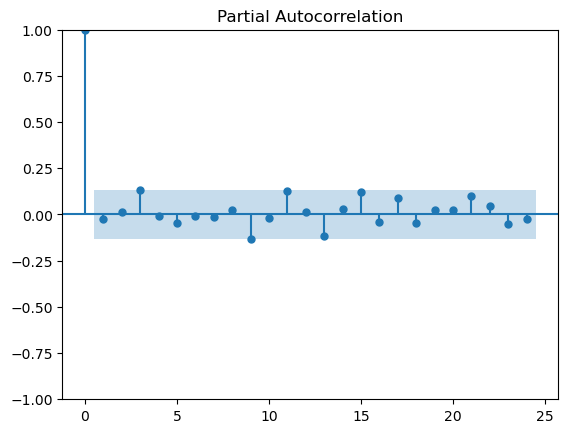

In [6]:
plot_pacf(df['Log_Returns'])

In [7]:
train_end = datetime(2024,5,31)

train_data = df['Log_Returns'][:train_end]
test_data = df[train_end + timedelta(days=1):]

In [8]:
p_orders = range(1,5)
q_orders = range(1,5)
fitted_model_dict = {}

for p_order in p_orders:
    for q_order in q_orders:    

        model = arch_model(train_data, p = p_order, q = q_order)
        model_fit = model.fit()
        fitted_model_dict[(p_order, q_order)] = model_fit #this saves the model_fit to the right key

lowest_bic = float('inf')
best_order = None

for p_order in p_orders:
    for q_order in q_orders:
        bic_value = fitted_model_dict[(p_order, q_order)].bic #model_fit.bic
        if bic_value < lowest_bic:
            lowest_bic = bic_value
            best_order = (p_order, q_order)

print(f'Lowest BIC: {lowest_bic} for p = {best_order[0]} and q = {best_order[1]}')

c:\Users\Bogdan\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001642. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Bogdan\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001642. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Bogdan\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataS

Iteration:      1,   Func. Count:      6,   Neg. LLF: 266295.06184033456
Iteration:      2,   Func. Count:     16,   Neg. LLF: -327.61806223633096
Iteration:      3,   Func. Count:     23,   Neg. LLF: -352.66971855306315
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4420.609847496854
Iteration:      5,   Func. Count:     39,   Neg. LLF: -325.8483538606762
Iteration:      6,   Func. Count:     45,   Neg. LLF: -283.6583356299121
Iteration:      7,   Func. Count:     52,   Neg. LLF: -325.8637443149724
Iteration:      8,   Func. Count:     58,   Neg. LLF: -323.7382572416522
Iteration:      9,   Func. Count:     64,   Neg. LLF: 62464698.36458705
Iteration:     10,   Func. Count:     74,   Neg. LLF: 1075.2971534883884
Iteration:     11,   Func. Count:     82,   Neg. LLF: -280.57688574830627
Iteration:     12,   Func. Count:     90,   Neg. LLF: -332.06034530967395
Iteration:     13,   Func. Count:     97,   Neg. LLF: -356.0309967087253
Iteration:     14,   Func. Count:    103,   Neg. 

c:\Users\Bogdan\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001642. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Bogdan\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001642. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Bogdan\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataS

Iteration:     18,   Func. Count:    168,   Neg. LLF: -358.38919106003834
Iteration:     19,   Func. Count:    176,   Neg. LLF: -358.38949751258576
Iteration:     20,   Func. Count:    184,   Neg. LLF: -358.38950945673616
Iteration:     21,   Func. Count:    192,   Neg. LLF: -358.38951144154646
Iteration:     22,   Func. Count:    199,   Neg. LLF: -358.38951144154345
Optimization terminated successfully    (Exit mode 0)
            Current function value: -358.38951144154646
            Iterations: 22
            Function evaluations: 199
            Gradient evaluations: 22
Iteration:      1,   Func. Count:     10,   Neg. LLF: 395977.5392291161
Iteration:      2,   Func. Count:     24,   Neg. LLF: -205.93831328908288
Iteration:      3,   Func. Count:     37,   Neg. LLF: -178.39333394602414
Iteration:      4,   Func. Count:     48,   Neg. LLF: -345.0815037951046
Iteration:      5,   Func. Count:     58,   Neg. LLF: -354.59097414741007
Iteration:      6,   Func. Count:     68,   Neg. LL

c:\Users\Bogdan\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001642. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Bogdan\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001642. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Bogdan\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataS

Iteration:      1,   Func. Count:     10,   Neg. LLF: 2159.0139931741946
Iteration:      2,   Func. Count:     24,   Neg. LLF: 89.19605706593401
Iteration:      3,   Func. Count:     37,   Neg. LLF: -185.8329385618938
Iteration:      4,   Func. Count:     48,   Neg. LLF: -351.6181076825127
Iteration:      5,   Func. Count:     58,   Neg. LLF: -353.60304444239904
Iteration:      6,   Func. Count:     68,   Neg. LLF: -357.594641209245
Iteration:      7,   Func. Count:     77,   Neg. LLF: -357.54482570382623
Iteration:      8,   Func. Count:     88,   Neg. LLF: -351.5213418024846
Iteration:      9,   Func. Count:     99,   Neg. LLF: -358.15030910637506
Iteration:     10,   Func. Count:    109,   Neg. LLF: -358.37449494612076
Iteration:     11,   Func. Count:    118,   Neg. LLF: -358.3760929667836
Iteration:     12,   Func. Count:    128,   Neg. LLF: -358.38811017472096
Iteration:     13,   Func. Count:    137,   Neg. LLF: -358.3894921231033
Iteration:     14,   Func. Count:    146,   Neg.

c:\Users\Bogdan\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001642. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Bogdan\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001642. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Bogdan\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataS

Iteration:      2,   Func. Count:     24,   Neg. LLF: -55.23406712121424
Iteration:      3,   Func. Count:     37,   Neg. LLF: -186.95776047253133
Iteration:      4,   Func. Count:     48,   Neg. LLF: -351.45939447237294
Iteration:      5,   Func. Count:     58,   Neg. LLF: -355.39137426127087
Iteration:      6,   Func. Count:     68,   Neg. LLF: -338.71537676863966
Iteration:      7,   Func. Count:     78,   Neg. LLF: -355.4321006457451
Iteration:      8,   Func. Count:     88,   Neg. LLF: -357.94709618916715
Iteration:      9,   Func. Count:     97,   Neg. LLF: -355.4664869043197
Iteration:     10,   Func. Count:    107,   Neg. LLF: -356.55593977712476
Iteration:     11,   Func. Count:    118,   Neg. LLF: -358.03536611252906
Iteration:     12,   Func. Count:    127,   Neg. LLF: -358.0356710471175
Iteration:     13,   Func. Count:    136,   Neg. LLF: -358.0356802911715
Iteration:     14,   Func. Count:    145,   Neg. LLF: -358.03568484959067
Iteration:     15,   Func. Count:    153,  

In [9]:
model = arch_model(train_data, p = 1, q = 1)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 266295.06184033456
Iteration:      2,   Func. Count:     16,   Neg. LLF: -327.61806223633096
Iteration:      3,   Func. Count:     23,   Neg. LLF: -352.66971855306315
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4420.609847496854
Iteration:      5,   Func. Count:     39,   Neg. LLF: -325.8483538606762
Iteration:      6,   Func. Count:     45,   Neg. LLF: -283.6583356299121
Iteration:      7,   Func. Count:     52,   Neg. LLF: -325.8637443149724
Iteration:      8,   Func. Count:     58,   Neg. LLF: -323.7382572416522
Iteration:      9,   Func. Count:     64,   Neg. LLF: 62464698.36458705
Iteration:     10,   Func. Count:     74,   Neg. LLF: 1075.2971534883884
Iteration:     11,   Func. Count:     82,   Neg. LLF: -280.57688574830627
Iteration:     12,   Func. Count:     90,   Neg. LLF: -332.06034530967395
Iteration:     13,   Func. Count:     97,   Neg. LLF: -356.0309967087253
Iteration:     14,   Func. Count:    103,   Neg. 

c:\Users\Bogdan\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001642. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:            Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                357.100
Distribution:                  Normal   AIC:                          -706.201
Method:            Maximum Likelihood   BIC:                          -693.068
                                        No. Observations:                  197
Date:                Tue, Oct 01 2024   Df Residuals:                      196
Time:                        20:53:56   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         4.0240e-03  2.740e-03      1.468      0.142 [-1.347e-03,9.395e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      6.7420e-05  3.169e-05      2.127  3.338e-02  [5.309e-06,1.295e-04]
alpha[1]       0.0398  2.502e-02      1.590      0.112 [-9.261e-03,8.880e-02]
beta[1]        0.9202  2.286e-02     40.252      0.000      [  0.875,  0.965]
=============================================================================

Covariance estimator: robust
"""

In [10]:
rolling_predictions = pd.Series(index=test_data.index)

for i in test_data.index:
    train_data = df['Log_Returns'][:i - timedelta(days=1)]
    model = arch_model(train_data, p = 1, q = 1)
    model_fit = model.fit()
    predictions = model_fit.forecast(horizon=1)
    rolling_predictions.loc[i] = np.sqrt(predictions.variance.values[-1]) #the output of predictions is an array
    
rolling_predictions

c:\Users\Bogdan\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001642. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 266295.06184033456
Iteration:      2,   Func. Count:     16,   Neg. LLF: -327.61806223633096
Iteration:      3,   Func. Count:     23,   Neg. LLF: -352.66971855306315
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4420.609847496854
Iteration:      5,   Func. Count:     39,   Neg. LLF: -325.8483538606762
Iteration:      6,   Func. Count:     45,   Neg. LLF: -283.6583356299121
Iteration:      7,   Func. Count:     52,   Neg. LLF: -325.8637443149724
Iteration:      8,   Func. Count:     58,   Neg. LLF: -323.7382572416522
Iteration:      9,   Func. Count:     64,   Neg. LLF: 62464698.36458705
Iteration:     10,   Func. Count:     74,   Neg. LLF: 1075.2971534883884
Iteration:     11,   Func. Count:     82,   Neg. LLF: -280.57688574830627
Iteration:     12,   Func. Count:     90,   Neg. LLF: -332.06034530967395
Iteration:     13,   Func. Count:     97,   Neg. LLF: -356.0309967087253
Iteration:     14,   Func. Count:    103,   Neg. 

c:\Users\Bogdan\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001634. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Bogdan\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001641. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Bogdan\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataS

Iteration:      1,   Func. Count:      6,   Neg. LLF: 20854965.552545816
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1525.2102847831175
Iteration:      3,   Func. Count:     26,   Neg. LLF: 4176.857480046164
Optimization terminated successfully    (Exit mode 0)
            Current function value: -358.94920379467675
            Iterations: 4
            Function evaluations: 31
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 16303467.492012037
Iteration:      2,   Func. Count:     16,   Neg. LLF: -331.0342200924864
Iteration:      3,   Func. Count:     22,   Neg. LLF: -329.6229829296682
Iteration:      4,   Func. Count:     28,   Neg. LLF: -329.779234466107
Iteration:      5,   Func. Count:     34,   Neg. LLF: -339.1514010817972
Iteration:      6,   Func. Count:     40,   Neg. LLF: -282.539261385586
Iteration:      7,   Func. Count:     47,   Neg. LLF: 46557.75410391335
Iteration:      8,   Func. Count:     57,   Neg. LLF: 670941.9901

c:\Users\Bogdan\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001641. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:     15,   Func. Count:    110,   Neg. LLF: -358.3828307061039
Iteration:     16,   Func. Count:    116,   Neg. LLF: -356.8303918632619
Iteration:     17,   Func. Count:    122,   Neg. LLF: -343.35511541715726
Iteration:     18,   Func. Count:    129,   Neg. LLF: -359.68726944518744
Iteration:     19,   Func. Count:    135,   Neg. LLF: -362.2039681680758
Iteration:     20,   Func. Count:    140,   Neg. LLF: -362.20397957721025
Iteration:     21,   Func. Count:    144,   Neg. LLF: -362.20397957677847
Optimization terminated successfully    (Exit mode 0)
            Current function value: -362.20397957721025
            Iterations: 23
            Function evaluations: 144
            Gradient evaluations: 21
Iteration:      1,   Func. Count:      6,   Neg. LLF: 48289225.818292335
Iteration:      2,   Func. Count:     16,   Neg. LLF: -332.524324319382
Iteration:      3,   Func. Count:     22,   Neg. LLF: -332.5271977496667
Iteration:      4,   Func. Count:     28,   Neg. LLF: -

c:\Users\Bogdan\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001633. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Bogdan\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001627. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      3,   Func. Count:     22,   Neg. LLF: 17151.048691357933
Iteration:      4,   Func. Count:     32,   Neg. LLF: 6805.91429979171
Iteration:      5,   Func. Count:     40,   Neg. LLF: -364.3099503043303
Iteration:      6,   Func. Count:     46,   Neg. LLF: 76095.10891572117
Iteration:      7,   Func. Count:     56,   Neg. LLF: 234718.86781834697
Iteration:      8,   Func. Count:     66,   Neg. LLF: -337.97131414624903
Iteration:      9,   Func. Count:     72,   Neg. LLF: -337.2921366090494
Iteration:     10,   Func. Count:     78,   Neg. LLF: -345.31315031929347
Iteration:     11,   Func. Count:     84,   Neg. LLF: 24170.620099618394
Iteration:     12,   Func. Count:     94,   Neg. LLF: 3680.9207620251696
Iteration:     13,   Func. Count:    103,   Neg. LLF: -368.76692748170206
Optimization terminated successfully    (Exit mode 0)
            Current function value: -368.7669276371063
            Iterations: 17
            Function evaluations: 103
            Gradient ev

c:\Users\Bogdan\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001621. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 50981501.776332006
Iteration:      2,   Func. Count:     16,   Neg. LLF: -352.2337617189624
Iteration:      3,   Func. Count:     22,   Neg. LLF: -338.82863964321376
Iteration:      4,   Func. Count:     28,   Neg. LLF: 897594.9744274861
Iteration:      5,   Func. Count:     38,   Neg. LLF: 8227.37044468509
Iteration:      6,   Func. Count:     45,   Neg. LLF: -366.61509157706166
Iteration:      7,   Func. Count:     51,   Neg. LLF: -315.5625102139668
Iteration:      8,   Func. Count:     58,   Neg. LLF: -191.4507739705988
Iteration:      9,   Func. Count:     68,   Neg. LLF: -60.24968930280583
Iteration:     10,   Func. Count:     78,   Neg. LLF: 558932678.6388075
Iteration:     11,   Func. Count:     88,   Neg. LLF: -341.1400718257954
Iteration:     12,   Func. Count:     94,   Neg. LLF: -366.0900462462205
Iteration:     13,   Func. Count:    101,   Neg. LLF: 378878.9561427176
Iteration:     14,   Func. Count:    111,   Neg. LLF: 

c:\Users\Bogdan\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001613. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Bogdan\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001617. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 20831106.48339861
Iteration:      2,   Func. Count:     16,   Neg. LLF: -346.7435531076136
Iteration:      3,   Func. Count:     22,   Neg. LLF: -343.31508109590516
Iteration:      4,   Func. Count:     28,   Neg. LLF: -370.9202088559824
Iteration:      5,   Func. Count:     35,   Neg. LLF: 103.38277919097072
Iteration:      6,   Func. Count:     43,   Neg. LLF: 2182426943581.4211
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1257.1748952213568
Iteration:      8,   Func. Count:     61,   Neg. LLF: -322.6854331632718
Iteration:      9,   Func. Count:     69,   Neg. LLF: -351.9500977115583
Iteration:     10,   Func. Count:     75,   Neg. LLF: -373.8713370449549
Iteration:     11,   Func. Count:     81,   Neg. LLF: -203.16741237352375
Iteration:     12,   Func. Count:     88,   Neg. LLF: -372.2749427153397
Iteration:     13,   Func. Count:     94,   Neg. LLF: -332.532953406597
Iteration:     14,   Func. Count:    100,   Neg. LL

c:\Users\Bogdan\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001614. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:     18,   Func. Count:    123,   Neg. LLF: -374.9865258116904
Iteration:     19,   Func. Count:    128,   Neg. LLF: -374.9865302223735
Iteration:     20,   Func. Count:    132,   Neg. LLF: -374.9865302220885
Optimization terminated successfully    (Exit mode 0)
            Current function value: -374.9865302223735
            Iterations: 21
            Function evaluations: 132
            Gradient evaluations: 20
Iteration:      1,   Func. Count:      6,   Neg. LLF: 11259900.107534196
Iteration:      2,   Func. Count:     16,   Neg. LLF: -346.46335689646196
Iteration:      3,   Func. Count:     22,   Neg. LLF: -346.4627445947156
Iteration:      4,   Func. Count:     28,   Neg. LLF: 5836.34651278452
Iteration:      5,   Func. Count:     38,   Neg. LLF: 1096.2587189691258
Iteration:      6,   Func. Count:     45,   Neg. LLF: -372.47458499595297
Iteration:      7,   Func. Count:     51,   Neg. LLF: -141.48505010609796
Iteration:      8,   Func. Count:     61,   Neg. LLF: -342

c:\Users\Bogdan\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001608. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Bogdan\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001607. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      4,   Func. Count:     32,   Neg. LLF: 78196.18143004921
Iteration:      5,   Func. Count:     40,   Neg. LLF: -376.71748956527347
Iteration:      6,   Func. Count:     46,   Neg. LLF: 11055.587434883053
Iteration:      7,   Func. Count:     55,   Neg. LLF: 2313014.1499731764
Iteration:      8,   Func. Count:     65,   Neg. LLF: -350.47969326247295
Iteration:      9,   Func. Count:     71,   Neg. LLF: 3636.2822092790666
Iteration:     10,   Func. Count:     81,   Neg. LLF: 2030.0592817194922
Iteration:     11,   Func. Count:     89,   Neg. LLF: -376.44079534959826
Iteration:     12,   Func. Count:     95,   Neg. LLF: 217.37213516444933
Iteration:     13,   Func. Count:    105,   Neg. LLF: -325.3336301609763
Iteration:     14,   Func. Count:    112,   Neg. LLF: -372.0731525289069
Iteration:     15,   Func. Count:    118,   Neg. LLF: -10.79271109012729
Iteration:     16,   Func. Count:    126,   Neg. LLF: -378.07619912033556
Iteration:     17,   Func. Count:    132,   Neg.

c:\Users\Bogdan\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001616. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 8228400.940879612
Iteration:      2,   Func. Count:     16,   Neg. LLF: -351.60193743154525
Iteration:      3,   Func. Count:     22,   Neg. LLF: 2320.5262610955047
Iteration:      4,   Func. Count:     32,   Neg. LLF: 4330.736355558234
Iteration:      5,   Func. Count:     40,   Neg. LLF: -377.43074297812024
Iteration:      6,   Func. Count:     46,   Neg. LLF: 142974.66604598626
Iteration:      7,   Func. Count:     56,   Neg. LLF: 711.9732962247192
Iteration:      8,   Func. Count:     66,   Neg. LLF: 1969.2302028623385
Iteration:      9,   Func. Count:     76,   Neg. LLF: -373.060747004931
Iteration:     10,   Func. Count:     82,   Neg. LLF: -378.323983256139
Iteration:     11,   Func. Count:     88,   Neg. LLF: -366.7564679149017
Iteration:     12,   Func. Count:     94,   Neg. LLF: -376.0529916737863
Iteration:     13,   Func. Count:    100,   Neg. LLF: -381.4786338875074
Iteration:     14,   Func. Count:    106,   Neg. LLF: 

c:\Users\Bogdan\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001609. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


DATE
2024-06-02    0.033986
2024-06-09    0.030102
2024-06-16    0.035205
2024-06-23    0.036221
2024-06-30    0.036180
2024-07-07    0.035523
2024-07-14    0.036386
2024-07-21    0.034844
2024-07-28    0.034219
2024-08-04    0.035440
2024-08-11    0.035445
2024-08-18    0.035044
2024-08-25    0.035417
2024-09-01    0.037151
2024-09-08    0.036533
dtype: float64

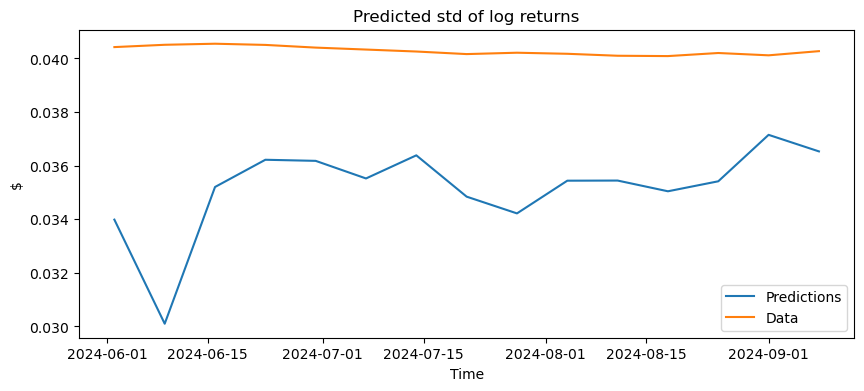

In [11]:
plt.figure(figsize=(10,4))
plt.plot(rolling_predictions, label='Predictions')
plt.plot(test_data['Std_Dev'], label='Data')
plt.title('Predicted std of log returns')
plt.ylabel('$')
plt.xlabel('Time')
plt.legend()

Text(0, 0.5, '$')

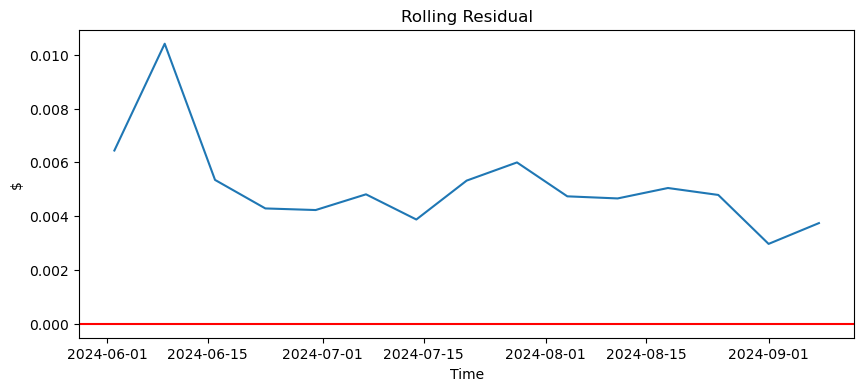

In [12]:
rolling_residual = test_data['Std_Dev'] - rolling_predictions

plt.figure(figsize=(10,4))
plt.plot(rolling_residual)
plt.axhline(y=0, color = 'r')
plt.title('Rolling Residual')
plt.xlabel('Time')
plt.ylabel('$')

In [13]:
print('Mean abs % error:',np.mean(abs(rolling_residual/test_data['Std_Dev'])))

Mean abs % error: 0.12675929339133277


In [14]:
print('Root mean squared error:',np.sqrt(np.mean(rolling_residual**2)))

Root mean squared error: 0.005368780673041626
